In [2]:
"""
Author: Yun Fei Li, yl4252@gsb.columbia.edu
Uni: yl4252
Course: Big Data in Finance (Spring 2020)
Date: 2020-02
Code:
    Homework II. Portfolio sorts.

------

Dependence:
fire_pytools

"""

# %% Packages
import pandas as pd
import time

import data_import.stock_annual as stock_annual
import data_import.stock_monthly as stock_monthly

# Packages from fire_pytools
from utils.monthly_date import *

from portools.find_breakpoints import find_breakpoints
from portools.sort_portfolios import sort_portfolios

desired_width = 10
pd.set_option('display.width', desired_width)
idx = pd.IndexSlice

# %% Set Up

In [3]:
# %% Download Data
# Monthly Data
mdata = stock_monthly.main()

# Annual Data
adata = stock_annual.main()

# Set names
adata.drop(columns='inv', inplace=True)
adata.rename(columns={'mesum_june': 'me', 'inv_gvkey': 'inv'}, inplace=True) #inv_permco

# %% Create Filters
# shrcd must be (10,11)
# ---------------------
print('Data deleted due to shrcd: %f' % np.round((1-adata.shrcd.isin([10, 11]).mean())*100, 2))
sort_data = adata[adata.shrcd.isin([10, 11])].copy()

# exchcd must be (1, 2, 3)
# ------------------------
print('Data deleted due to exchcd: %f' % np.round((1-sort_data.exchcd.isin([1, 2, 3]).mean())*100, 2))
sort_data = sort_data[sort_data.exchcd.isin([1, 2, 3])]

#del adata, mdata

# %% Portfolio Sorts
## ME X BEME
# notice that the way we defined beme or beme is null if be<=0
sample_filters = ((sort_data.me > 0) &
                  (sort_data.mesum_dec > 0) &
                  (sort_data.beme.notnull()))

beme_sorts = sort_portfolios(data=sort_data[sample_filters],
                             quantiles={'me': [0.5], 'beme': [0.3, 0.7]},
                             id_variables=['rankyear', 'permno', 'exchcd'],
                             exch_cd=[1]
                             )

Enter your WRDS username [YF Li]:lyf95042
Enter your password:········
WRDS recommends setting up a .pgpass file.
You can find more info here:
https://www.postgresql.org/docs/9.5/static/libpq-pgpass.html.
Loading library list...
Done
CRSP data was successfully downloaded in 42.50340557098389 seconds.
Time to create CRSP monthly: 72.36890053749084 seconds
Successfully saved stock_monthly.
Stock annual calculation.
Enter your WRDS username [YF Li]:lyf95042
Enter your password:········
WRDS recommends setting up a .pgpass file.
You can find more info here:
https://www.postgresql.org/docs/9.5/static/libpq-pgpass.html.
Loading library list...
Done
Compustat data was successfully downloaded in 14.39275074005127 seconds.
Pension data was successfully downloaded in 0.7744221687316895 seconds.
CRSP data was successfully downloaded in 93.21876740455627 seconds.
CRSP and Compsuat merge created 6 (fyear, permno) duplicates.
Keeping only the last available datadate per PERMNO.
There are 81664 PERMN

In [5]:
def calculate_cumulative_returns(mdata, tt, min_periods): # TODO: to be completed
    """
    Calculate past returns for momentum strategy

    Parameters:
    ------------
    mdata: data frame
        crsp monthly data with cols permno, date as index.
    tt: int
        number of periods to cumulate retuns
    min_periods: int
        minimum number of periods. Default tt/2.
    """
    start_time = time.time()

    required_cols = ['date', 'permno','retadj']

    assert set(required_cols).issubset(mdata.columns), "Required columns: {}.".format(', '.join(required_cols))

    df = mdata[required_cols].copy()
    df['retadj'] = df['retadj']+1

    df.reset_index(level=0, inplace=True)

    # Cumulative Return (adjusted) in 11 months
    cret = df.groupby('permno').retadj.rolling(window = tt, min_periods = 1).apply(np.prod, raw = True)
    cret = cret - 1
    cret = cret.to_frame('ret_' + str(tt) + '_1')
    cret.reset_index(level=0, inplace=True)
    cret['ret_' + str(tt) + '_1'] = cret.groupby(['permno'])['ret_' + str(tt) + '_1'].shift(1)
    cret = cret.reset_index()
    # You should calculate the cumulative returns.

    print("Time to calculate %d months past returns: %s seconds" % (tt, str(round(time.time() - start_time, 2))))

    return cret

In [6]:
ret_11_1 = calculate_cumulative_returns(mdata, 11, 6)

Time to calculate 11 months past returns: 21.1 seconds


In [7]:
ret_11_1

index  \
0              0   
1              1   
2              2   
3              3   
4              4   
5              5   
6              6   
7              7   
8              8   
9              9   
10            10   
11            11   
12            12   
13            13   
14            14   
15            15   
16            16   
17            17   
18            18   
19            19   
20            20   
21            21   
22            22   
23            23   
24            24   
25            25   
26            26   
27            27   
28            28   
29            29   
...          ...   
1735682  1735682   
1735683  1735683   
1735684  1735684   
1735685  1735685   
1735686  1735686   
1735687  1735687   
1735688  1735688   
1735689  1735689   
1735690  1735690   
1735691  1735691   
1735692  1735692   
1735693  1735693   
1735694  1735694   
1735695  1735695   
1735696  1735696   
1735697  1735697   
1735698  1735698   
1735699  1735699   
1735700  1735700   
1735701  1735701   
1735702  1735702   
1735703  1735703   
1735704  1735704   
1735705  1735705   
1735706  1735706   
1735707  1735707   
1735708  1735708   
1735709  1735709   
1735710  1735710   
1735711  1735711   

         permno  \
0         10001   
1         10001   
2         10001   
3         10001   
4         10001   
5         10001   
6         10001   
7         10001   
8         10001   
9         10001   
10        10001   
11        10001   
12        10001   
13        10001   
14        10001   
15        10001   
16        10001   
17        10001   
18        10001   
19        10001   
20        10001   
21        10001   
22        10001   
23        10001   
24        10001   
25        10001   
26        10001   
27        10001   
28        10001   
29        10001   
...         ...   
1735682   93436   
1735683   93436   
1735684   93436   
1735685   93436   
1735686   93436   
1735687   93436   
1735688   93436   
1735689   93436   
1735690   93436   
1735691   93436   
1735692   93436   
1735693   93436   
1735694   93436   
1735695   93436   
1735696   93436   
1735697   93436   
1735698   93436   
1735699   93436   
1735700   93436   
1735701   93436   
1735702   93436   
1735703   93436   
1735704   93436   
1735705   93436   
1735706   93436   
1735707   93436   
1735708   93436   
1735709   93436   
1735710   93436   
1735711   93436   

         ret_11_1  
0             NaN  
1       -0.044118  
2       -0.029412  
3       -0.044706  
4       -0.033511  
5       -0.055901  
6       -0.029779  
7       -0.044939  
8        0.000540  
9        0.076338  
10       0.107091  
11       0.176284  
12       0.270789  
13       0.267580  
14       0.271572  
15       0.305183  
16       0.302733  
17       0.391175  
18       0.575715  
19       0.542331  
20       0.463339  
21       0.391587  
22       0.265889  
23       0.220522  
24       0.213456  
25       0.212912  
26       0.105972  
27       0.116309  
28      -0.026816  
29      -0.114214  
...           ...  
1735682  0.540142  
1735683  0.525730  
1735684  0.744351  
1735685  0.725080  
1735686  0.750422  
1735687  0.445318  
1735688  0.235859  
1735689  0.417297  
1735690  0.232699  
1735691 -0.152641  
1735692 -0.138148  
1735693 -0.212605  
1735694  0.060222  
1735695 -0.162293  
1735696 -0.115626  
1735697 -0.201369  
1735698  0.092181  
1735699  0.125678  
1735700 -0.060710  
1735701 -0.105055  
1735702  0.201969  
1735703 -0.047771  
1735704 -0.161697  
1735705 -0.460096  
1735706 -0.250486  
1735707 -0.199065  
1735708 -0.147902  
1735709 -0.285930  
1735710 -0.101461  
1735711 -0.008594  

[1735712 rows x 3 columns]

In [8]:
mdata['ret_11_1']= ret_11_1['ret_11_1']
mdata

permno  \
0         10001   
1         10001   
2         10001   
3         10001   
4         10001   
5         10001   
6         10001   
7         10001   
8         10001   
9         10001   
10        10001   
11        10001   
12        10001   
13        10001   
14        10001   
15        10001   
16        10001   
17        10001   
18        10001   
19        10001   
20        10001   
21        10001   
22        10001   
23        10001   
24        10001   
25        10001   
26        10001   
27        10001   
28        10001   
29        10001   
...         ...   
1735682   93436   
1735683   93436   
1735684   93436   
1735685   93436   
1735686   93436   
1735687   93436   
1735688   93436   
1735689   93436   
1735690   93436   
1735691   93436   
1735692   93436   
1735693   93436   
1735694   93436   
1735695   93436   
1735696   93436   
1735697   93436   
1735698   93436   
1735699   93436   
1735700   93436   
1735701   93436   
1735702   93436   
1735703   93436   
1735704   93436   
1735705   93436   
1735706   93436   
1735707   93436   
1735708   93436   
1735709   93436   
1735710   93436   
1735711   93436   

              date  \
0       2000-01-31   
1       2000-02-29   
2       2000-03-31   
3       2000-04-28   
4       2000-05-31   
5       2000-06-30   
6       2000-07-31   
7       2000-08-31   
8       2000-09-29   
9       2000-10-31   
10      2000-11-30   
11      2000-12-29   
12      2001-01-31   
13      2001-02-28   
14      2001-03-30   
15      2001-04-30   
16      2001-05-31   
17      2001-06-29   
18      2001-07-31   
19      2001-08-31   
20      2001-09-28   
21      2001-10-31   
22      2001-11-30   
23      2001-12-31   
24      2002-01-31   
25      2002-02-28   
26      2002-03-28   
27      2002-04-30   
28      2002-05-31   
29      2002-06-28   
...            ...   
1735682 2017-07-31   
1735683 2017-08-31   
1735684 2017-09-29   
1735685 2017-10-31   
1735686 2017-11-30   
1735687 2017-12-29   
1735688 2018-01-31   
1735689 2018-02-28   
1735690 2018-03-29   
1735691 2018-04-30   
1735692 2018-05-31   
1735693 2018-06-29   
1735694 2018-07-31   
1735695 2018-08-31   
1735696 2018-09-28   
1735697 2018-10-31   
1735698 2018-11-30   
1735699 2018-12-31   
1735700 2019-01-31   
1735701 2019-02-28   
1735702 2019-03-29   
1735703 2019-04-30   
1735704 2019-05-31   
1735705 2019-06-28   
1735706 2019-07-31   
1735707 2019-08-30   
1735708 2019-09-30   
1735709 2019-10-31   
1735710 2019-11-29   
1735711 2019-12-31   

         dlret  \
0          NaN   
1          NaN   
2          NaN   
3          NaN   
4          NaN   
5          NaN   
6          NaN   
7          NaN   
8          NaN   
9          NaN   
10         NaN   
11         NaN   
12         NaN   
13         NaN   
14         NaN   
15         NaN   
16         NaN   
17         NaN   
18         NaN   
19         NaN   
20         NaN   
21         NaN   
22         NaN   
23         NaN   
24         NaN   
25         NaN   
26         NaN   
27         NaN   
28         NaN   
29         NaN   
...        ...   
1735682    NaN   
1735683    NaN   
1735684    NaN   
1735685    NaN   
1735686    NaN   
1735687    NaN   
1735688    NaN   
1735689    NaN   
1735690    NaN   
1735691    NaN   
1735692    NaN   
1735693    NaN   
1735694    NaN   
1735695    NaN   
1735696    NaN   
1735697    NaN   
1735698    NaN   
1735699    NaN   
1735700    NaN   
1735701    NaN   
1735702    NaN   
1735703    NaN   
1735704    NaN   
1735705    NaN   
1735706    NaN   
1735707    NaN   
1735708    NaN   
1735709    NaN   
1735710    NaN   
1735711    NaN   

         dlretx  \
0           NaN   
1           NaN   
2           NaN   
3           NaN   
4           NaN   
5           NaN   
6           NaN   
7           NaN   
8           NaN   
9           NaN   
10          NaN   
11          NaN   
12          NaN   
13          NaN   
14          NaN   
15          NaN   
16          NaN   
17    

# Stock Monthly Questions

# Question 1

In [9]:
# %% Stock Monthly Questions
# Data for December 2019
dec_2019 = mdata[(mdata.date.dt.year==2019)&(mdata.date.dt.month==12)]
# Number of missings for each column
dec_2019.isna().sum()

permno             0
date               0
dlret           7543
dlretx          7543
exchcd             0
naics             39
permco             0
prc               61
ret               62
shrcd              0
shrout             0
siccd             25
ticker             0
retadj            10
me                61
mesum_permco      46
mesum           7595
melag              0
rankyear           0
ret_11_1         536
dtype: int64

In [10]:
# Number of unique permnos
dec_2019['permno'].nunique()

7595

In [11]:
# Average,min,max of ret_11_1
print("Average of ret_11_1 for Deceomber 2019: " + str(dec_2019['ret_11_1'].mean()))
print("Min of ret_11_1 for Deceomber 2019: " + str(dec_2019['ret_11_1'].min()))
print("Max of ret_11_1 for Deceomber 2019: " + str(dec_2019['ret_11_1'].max()))


Average of ret_11_1 for Deceomber 2019: 0.16460373844785944
Min of ret_11_1 for Deceomber 2019: -0.9994244707713349
Max of ret_11_1 for Deceomber 2019: 12.960992730639935


# Question 2

In [12]:
# List top 10 firms with highest 11-months performance returns as December 2019
ten_highest = dec_2019.groupby(['permco'], sort=False)['ret_11_1'].max()
ten_highest = ten_highest.to_frame()
#ten_highest = ten_highest.sort_values('ret_11_1',ascending=False)
ten_highest = ten_highest.nlargest(10, 'ret_11_1')
ten_highest

ret_11_1
permco            
55477.0  12.960993
56452.0  10.610972
56405.0   7.423445
15073.0   5.486487
12204.0   4.878422
56462.0   4.627119
55821.0   4.464417
56066.0   4.234008
55512.0   4.208334
55347.0   4.195531

# Question 3

In [13]:
# List top 10 firms with lowest 11-months performance returns as December 2019
ten_lowest = dec_2019.groupby(['permco'], sort=False)['ret_11_1'].max()
ten_lowest = ten_lowest.to_frame()
#ten_highest = ten_highest.sort_values('ret_11_1',ascending=False)
ten_lowest = ten_lowest.nsmallest(10, 'ret_11_1')
ten_lowest

ret_11_1
permco           
52960.0 -0.999424
55594.0 -0.991961
15236.0 -0.988659
54832.0 -0.986897
55793.0 -0.985842
55565.0 -0.965919
55275.0 -0.961913
56389.0 -0.960798
55279.0 -0.953462
45436.0 -0.953426

# Stock Annual Questions

# Question 3

In [14]:
# %% Stock Annual Questions
beme_port = pd.merge(beme_sorts, sort_data, on=['permno','rankyear'], how='inner')
beme_port

rankyear  \
0         1926.0   
1         1926.0   
2         1926.0   
3         1926.0   
4         1926.0   
5         1926.0   
6         1926.0   
7         1926.0   
8         1926.0   
9         1926.0   
10        1926.0   
11        1926.0   
12        1926.0   
13        1926.0   
14        1926.0   
15        1926.0   
16        1926.0   
17        1926.0   
18        1926.0   
19        1926.0   
20        1926.0   
21        1926.0   
22        1926.0   
23        1926.0   
24        1926.0   
25        1926.0   
26        1926.0   
27        1926.0   
28        1926.0   
29        1926.0   
...          ...   
253480    2019.0   
253481    2019.0   
253482    2019.0   
253483    2019.0   
253484    2019.0   
253485    2019.0   
253486    2019.0   
253487    2019.0   
253488    2019.0   
253489    2019.0   
253490    2019.0   
253491    2019.0   
253492    2019.0   
253493    2019.0   
253494    2019.0   
253495    2019.0   
253496    2019.0   
253497    2019.0   
253498    2019.0   
253499    2019.0   
253500    2019.0   
253501    2019.0   
253502    2019.0   
253503    2019.0   
253504    2019.0   
253505    2019.0   
253506    2019.0   
253507    2019.0   
253508    2019.0   
253509    2019.0   

         permno  \
0       10006.0   
1       10022.0   
2       10030.0   
3       10057.0   
4       10073.0   
5       10081.0   
6       10102.0   
7       10110.0   
8       10129.0   
9       10137.0   
10      10145.0   
11      10153.0   
12      10161.0   
13      10188.0   
14      10209.0   
15      10217.0   
16      10233.0   
17      10241.0   
18      10268.0   
19      10276.0   
20      10284.0   
21      10292.0   
22      10305.0   
23      10313.0   
24      10321.0   
25      10348.0   
26      10356.0   
27      10364.0   
28      10372.0   
29      10380.0   
...         ...   
253480  93177.0   
253481  93179.0   
253482  93237.0   
253483  93246.0   
253484  93263.0   
253485  93266.0   
253486  93272.0   
253487  93274.0   
253488  93285.0   
253489  93289.0   
253490  93302.0   
253491  93304.0   
253492  93312.0   
253493  93330.0   
253494  93345.0   
253495  93347.0   
253496  93352.0   
253497  93356.0   
253498  93368.0   
253499  93372.0   
253500  93373.0   
253501  93374.0   
253502  93393.0   
253503  93397.0   
253504  93401.0   
253505  93420.0   
253506  93422.0   
253507  93426.0   
253508  93434.0   
253509  93436.0   

       bemeportfolio  \
0              beme2   
1              beme2   
2              beme1   
3              beme2   
4              beme3   
5              beme1   
6              beme1   
7              beme3   
8              beme2   
9              beme1   
10             beme1   
11             beme2   
12             beme2   
13             beme2   
14             beme3   
15             beme1   
16             beme2   
17             beme2   
18             beme3   
19             beme3   
20             beme2   
21             beme1   
22             beme3   
23             beme2   
24             beme1   
25             beme2   
26             beme3   
27             beme2   
28             beme1   
29             beme3   
...              ...   
253480         beme3   
253481         beme2   
253482         beme3   
253483         beme1   
253484         beme1   
253485         beme1   
253486         beme1   
253487         beme2   
253488         beme2   
253489         beme1   
253490         beme3   
253491         beme3   
253492         beme2   
253493         beme2   
253494         beme1   
253495         beme1   
253496         beme3   
253497         beme1   
253498         beme3   
253499         beme2   
253500         beme3   
253501         beme2   
253502         beme1   
253503         beme2   
253504         beme1   
253505         beme3   
253506         beme3   
253507         beme2   
253508         beme3   
253509         beme1   

       meportfolio  \
0              me2   
1              me1   
2              me2   
3          

In [24]:
import numpy as np
be_sum = beme_port.groupby(['rankyear','bemeportfolio'], sort=False)['be'].sum()
me_sum = beme_port.groupby(['rankyear','bemeportfolio'], sort=False)['me'].sum()
ratio = be_sum/me_sum
log_ratio = np.log(ratio)
log_ratio = log_ratio.to_frame()
log_ratio = log_ratio.reset_index()
beme3 = log_ratio[log_ratio.bemeportfolio == 'beme3']
beme3 = beme3.rename(columns={0: "value_beme3"})
beme1 = log_ratio[log_ratio.bemeportfolio == 'beme1']
beme1 = beme1.rename(columns={0: "value_beme1"})
beme = pd.merge(beme3, beme1, on=['rankyear'], how='outer')
beme['spread'] = beme['value_beme3'] - beme['value_beme1']
beme

rankyear  \
0     1926.0   
1     1927.0   
2     1928.0   
3     1929.0   
4     1930.0   
5     1931.0   
6     1932.0   
7     1933.0   
8     1934.0   
9     1935.0   
10    1936.0   
11    1937.0   
12    1938.0   
13    1939.0   
14    1940.0   
15    1941.0   
16    1942.0   
17    1943.0   
18    1944.0   
19    1945.0   
20    1946.0   
21    1947.0   
22    1948.0   
23    1949.0   
24    1950.0   
25    1951.0   
26    1952.0   
27    1953.0   
28    1954.0   
29    1955.0   
..       ...   
64    1990.0   
65    1991.0   
66    1992.0   
67    1993.0   
68    1994.0   
69    1995.0   
70    1996.0   
71    1997.0   
72    1998.0   
73    1999.0   
74    2000.0   
75    2001.0   
76    2002.0   
77    2003.0   
78    2004.0   
79    2005.0   
80    2006.0   
81    2007.0   
82    2008.0   
83    2009.0   
84    2010.0   
85    2011.0   
86    2012.0   
87    2013.0   
88    2014.0   
89    2015.0   
90    2016.0   
91    2017.0   
92    2018.0   
93    2019.0   

   bemeportfolio_x  \
0            beme3   
1            beme3   
2            beme3   
3            beme3   
4            beme3   
5            beme3   
6            beme3   
7            beme3   
8            beme3   
9            beme3   
10           beme3   
11           beme3   
12           beme3   
13           beme3   
14           beme3   
15           beme3   
16           beme3   
17           beme3   
18           beme3   
19           beme3   
20           beme3   
21           beme3   
22           beme3   
23           beme3   
24           beme3   
25           beme3   
26           beme3   
27           beme3   
28           beme3   
29           beme3   
..             ...   
64           beme3   
65           beme3   
66           beme3   
67           beme3   
68           beme3   
69           beme3   
70           beme3   
71           beme3   
72           beme3   
73           beme3   
74           beme3   
75           beme3   
76           beme3   
77           beme3   
78           beme3   
79           beme3   
80           beme3   
81           beme3   
82           beme3   
83           beme3   
84           beme3   
85           beme3   
86           beme3   
87           beme3   
88           beme3   
89           beme3   
90           beme3   
91           beme3   
92           beme3   
93           beme3   

    value_beme3  \
0     -5.957082   
1     -6.182488   
2     -6.285831   
3     -6.553496   
4     -5.953352   
5     -5.288475   
6     -3.918536   
7     -5.436306   
8     -5.267563   
9     -5.078441   
10    -5.855954   
11    -6.168360   
12    -5.375202   
13    -5.212454   
14    -5.324591   
15    -5.523031   
16    -5.235590   
17    -5.774323   
18    -5.902296   
19    -6.222775   
20    -6.529133   
21    -6.065900   
22    -6.206019   
23    -5.721945   
24    -5.927546   
25    -6.115838   
26    -6.140456   
27    -6.071723   
28    -6.080462   
29    -6.387357   
..          ...   
64    -6.657374   
65    -6.615886   
66    -6.828850   
67    -6.915370   
68    -7.001271   
69    -7.039446   
70    -7.036517   
71    -7.109675   
72    -7.244494   
73    -6.999089   
74    -6.638291   
75    -6.714376   
76    -6.732731   
77    -6.930745   
78    -7.094472   
79    -7.168264   
80    -7.209755   
81    -7.266166   
82    -6.701993   
83    -6.647101   
84    -6.842241   
85    -6.947340   
86    -6.739845   
87    -6.974948   
88    -7.109144   
89    -7.010227   
90    -6.899560   
91    -7.130944   
92    -7.097215   
93    -6.912112   

   bemeportfolio_y  \
0            beme1   
1            beme1   
2            beme1   
3            beme1   
4            beme1   
5            beme1   
6            beme1   
7            beme1   
8            beme1   
9            beme1   
10           beme1   
11           beme1   
12           beme1   
13           beme1   
14           beme1   
15           beme1   
16           beme1   
17           beme1   
18           beme1   
19           beme1   
20   

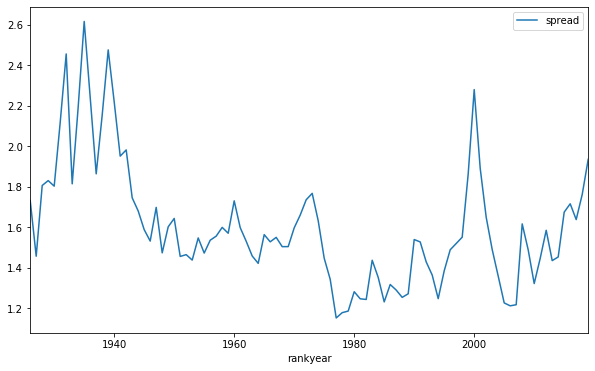

In [25]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
beme.plot(x ='rankyear', y='spread', kind = 'line')

Based on my plot, I guess that the performance of value-minus-growth strategies for the past 10 years is increasing and generate postive returns. Despite there are fluctuations at times, for a general trend, value stocks outperformed growth stocks in the last 10 years.

# Question 4

In [31]:
# TODO: ME X OP
sample_filters_OP = ((sort_data.be > 0) & (sort_data.beme.notnull()))

op_sorts = sort_portfolios(data=sort_data[sample_filters_OP],
                             quantiles={'me': [0.5], 'op': [0.3, 0.7]},
                             id_variables=['rankyear', 'permno', 'exchcd'],
                             exch_cd=[1]
                             )
op_sorts

NYSE breakpoints were calculated for me.
Stocks were sorted according to breakpoints, starting in 1926.0
NYSE breakpoints were calculated for op.
Stocks were sorted according to breakpoints, starting in 1951.0


rankyear  \
0         1951.0   
1         1951.0   
2         1951.0   
3         1951.0   
4         1951.0   
5         1951.0   
6         1951.0   
7         1951.0   
8         1951.0   
9         1951.0   
10        1951.0   
11        1951.0   
12        1951.0   
13        1951.0   
14        1951.0   
15        1951.0   
16        1951.0   
17        1951.0   
18        1951.0   
19        1951.0   
20        1951.0   
21        1951.0   
22        1951.0   
23        1951.0   
24        1951.0   
25        1951.0   
26        1951.0   
27        1951.0   
28        1951.0   
29        1951.0   
...          ...   
227561    2019.0   
227562    2019.0   
227563    2019.0   
227564    2019.0   
227565    2019.0   
227566    2019.0   
227567    2019.0   
227568    2019.0   
227569    2019.0   
227570    2019.0   
227571    2019.0   
227572    2019.0   
227573    2019.0   
227574    2019.0   
227575    2019.0   
227576    2019.0   
227577    2019.0   
227578    2019.0   
227579    2019.0   
227580    2019.0   
227581    2019.0   
227582    2019.0   
227583    2019.0   
227584    2019.0   
227585    2019.0   
227586    2019.0   
227587    2019.0   
227588    2019.0   
227589    2019.0   
227590    2019.0   

         permno  \
0       10006.0   
1       10102.0   
2       10153.0   
3       10161.0   
4       10188.0   
5       10217.0   
6       10233.0   
7       10241.0   
8       10268.0   
9       10321.0   
10      10364.0   
11      10401.0   
12      10460.0   
13      10479.0   
14      10487.0   
15      10495.0   
16      10559.0   
17      10604.0   
18      10620.0   
19      10727.0   
20      10743.0   
21      10751.0   
22      10786.0   
23      10866.0   
24      10890.0   
25      10970.0   
26      11017.0   
27      11068.0   
28      11092.0   
29      11105.0   
...         ...   
227561  93177.0   
227562  93179.0   
227563  93237.0   
227564  93246.0   
227565  93263.0   
227566  93266.0   
227567  93272.0   
227568  93274.0   
227569  93285.0   
227570  93289.0   
227571  93302.0   
227572  93304.0   
227573  93312.0   
227574  93330.0   
227575  93345.0   
227576  93347.0   
227577  93352.0   
227578  93356.0   
227579  93368.0   
227580  93372.0   
227581  93373.0   
227582  93374.0   
227583  93393.0   
227584  93397.0   
227585  93401.0   
227586  93420.0   
227587  93422.0   
227588  93426.0   
227589  93434.0   
227590  93436.0   

       opportfolio  \
0              op3   
1              op3   
2              op3   
3              op2   
4              op1   
5              op2   
6              op3   
7              op3   
8              op2   
9              op3   
10             op3   
11             op3   
12             op1   
13             op2   
14             op1   
15             op3   
16             op2   
17             op3   
18             op1   
19             op1   
20             op1   
21             op3   
22             op3   
23             op3   
24             op2   
25             op3   
26             op1   
27             op3   
28             op2   
29             op2   
...            ...   
227561         op1   
227562         op2   
227563         op1   
227564         op2   
227565         op1   
227566         op1   
227567         op1   
227568         op1   
227569         op1   
227570         op1   
227571         op1   
227572         op2   
227573         op2   
227574         op2   
227575         op1   
227576         op1   
227577         op1   
227578         op1   
227579         op1   
227580         op1   
227581         op1   
227582         op2   
227583         op1   
227584         op1   
227585         op1   
227586         op3   
227587         op1   
227588         op1   
227589         op1   
227590         op3   

       meportfolio  
0              me1  
1              me2  
2              me2  
3              me2  
4              me1  
5              me1  
6              me2  
7              me2  
8              me1  
9            

In [33]:
op_port = pd.merge(opbe_sorts, sort_data, on=['permno','rankyear'], how='inner')
op_port

rankyear  \
0         1951.0   
1         1951.0   
2         1951.0   
3         1951.0   
4         1951.0   
5         1951.0   
6         1951.0   
7         1951.0   
8         1951.0   
9         1951.0   
10        1951.0   
11        1951.0   
12        1951.0   
13        1951.0   
14        1951.0   
15        1951.0   
16        1951.0   
17        1951.0   
18        1951.0   
19        1951.0   
20        1951.0   
21        1951.0   
22        1951.0   
23        1951.0   
24        1951.0   
25        1951.0   
26        1951.0   
27        1951.0   
28        1951.0   
29        1951.0   
...          ...   
227561    2019.0   
227562    2019.0   
227563    2019.0   
227564    2019.0   
227565    2019.0   
227566    2019.0   
227567    2019.0   
227568    2019.0   
227569    2019.0   
227570    2019.0   
227571    2019.0   
227572    2019.0   
227573    2019.0   
227574    2019.0   
227575    2019.0   
227576    2019.0   
227577    2019.0   
227578    2019.0   
227579    2019.0   
227580    2019.0   
227581    2019.0   
227582    2019.0   
227583    2019.0   
227584    2019.0   
227585    2019.0   
227586    2019.0   
227587    2019.0   
227588    2019.0   
227589    2019.0   
227590    2019.0   

         permno  \
0       10006.0   
1       10102.0   
2       10153.0   
3       10161.0   
4       10188.0   
5       10217.0   
6       10233.0   
7       10241.0   
8       10268.0   
9       10321.0   
10      10364.0   
11      10401.0   
12      10460.0   
13      10479.0   
14      10487.0   
15      10495.0   
16      10559.0   
17      10604.0   
18      10620.0   
19      10727.0   
20      10743.0   
21      10751.0   
22      10786.0   
23      10866.0   
24      10890.0   
25      10970.0   
26      11017.0   
27      11068.0   
28      11092.0   
29      11105.0   
...         ...   
227561  93177.0   
227562  93179.0   
227563  93237.0   
227564  93246.0   
227565  93263.0   
227566  93266.0   
227567  93272.0   
227568  93274.0   
227569  93285.0   
227570  93289.0   
227571  93302.0   
227572  93304.0   
227573  93312.0   
227574  93330.0   
227575  93345.0   
227576  93347.0   
227577  93352.0   
227578  93356.0   
227579  93368.0   
227580  93372.0   
227581  93373.0   
227582  93374.0   
227583  93393.0   
227584  93397.0   
227585  93401.0   
227586  93420.0   
227587  93422.0   
227588  93426.0   
227589  93434.0   
227590  93436.0   

       opportfolio  \
0              op3   
1              op3   
2              op3   
3              op2   
4              op1   
5              op2   
6              op3   
7              op3   
8              op2   
9              op3   
10             op3   
11             op3   
12             op1   
13             op2   
14             op1   
15             op3   
16             op2   
17             op3   
18             op1   
19             op1   
20             op1   
21             op3   
22             op3   
23             op3   
24             op2   
25             op3   
26             op1   
27             op3   
28             op2   
29             op2   
...            ...   
227561         op1   
227562         op2   
227563         op1   
227564         op2   
227565         op1   
227566         op1   
227567         op1   
227568         op1   
227569         op1   
227570         op1   
227571         op1   
227572         op2   
227573         op2   
227574         op2   
227575         op1   
227576         op1   
227577         op1   
227578         op1   
227579         op1   
227580         op1   
227581         op1   
227582         op2   
227583         op1   
227584         op1   
227585         op1   
227586         op3   
227587         op1   
227588         op1   
227589         op1   
227590         op3   

       meportfolio  \
0              me1   
1              me2   
2              me2   
3              me2   
4              me1   
5              me1   
6              me2   
7              me2   
8              me1   
9  

In [53]:
op_sum = opbe_port.groupby(['rankyear','opportfolio'], sort=False)['op'].sum()
be_sum = opbe_port.groupby(['rankyear','opportfolio'], sort=False)['be'].sum()
ratio_2 = op_sum/be_sum
ratio_2 = ratio_2.to_frame()
ratio_2 = ratio_2.reset_index()
op3 = ratio_2[ratio_2.opportfolio == 'op3']
op3 = op3.rename(columns={0: "value_op3"})
op1 = ratio_2[ratio_2.opportfolio == 'op1']
op1 = op1.rename(columns={0: "value_op1"})
op = pd.merge(op3, op1, on=['rankyear'], how='outer')
op['spread'] = op['value_op3'] - op['value_op1']
op

rankyear  \
0     1951.0   
1     1952.0   
2     1953.0   
3     1954.0   
4     1955.0   
5     1956.0   
6     1957.0   
7     1958.0   
8     1959.0   
9     1960.0   
10    1961.0   
11    1962.0   
12    1963.0   
13    1964.0   
14    1965.0   
15    1966.0   
16    1967.0   
17    1968.0   
18    1969.0   
19    1970.0   
20    1971.0   
21    1972.0   
22    1973.0   
23    1974.0   
24    1975.0   
25    1976.0   
26    1977.0   
27    1978.0   
28    1979.0   
29    1980.0   
..       ...   
39    1990.0   
40    1991.0   
41    1992.0   
42    1993.0   
43    1994.0   
44    1995.0   
45    1996.0   
46    1997.0   
47    1998.0   
48    1999.0   
49    2000.0   
50    2001.0   
51    2002.0   
52    2003.0   
53    2004.0   
54    2005.0   
55    2006.0   
56    2007.0   
57    2008.0   
58    2009.0   
59    2010.0   
60    2011.0   
61    2012.0   
62    2013.0   
63    2014.0   
64    2015.0   
65    2016.0   
66    2017.0   
67    2018.0   
68    2019.0   

   opportfolio_x  \
0            op3   
1            op3   
2            op3   
3            op3   
4            op3   
5            op3   
6            op3   
7            op3   
8            op3   
9            op3   
10           op3   
11           op3   
12           op3   
13           op3   
14           op3   
15           op3   
16           op3   
17           op3   
18           op3   
19           op3   
20           op3   
21           op3   
22           op3   
23           op3   
24           op3   
25           op3   
26           op3   
27           op3   
28           op3   
29           op3   
..           ...   
39           op3   
40           op3   
41           op3   
42           op3   
43           op3   
44           op3   
45           op3   
46           op3   
47           op3   
48           op3   
49           op3   
50           op3   
51           op3   
52           op3   
53           op3   
54           op3   
55           op3   
56           op3   
57           op3   
58           op3   
59           op3   
60           op3   
61           op3   
62           op3   
63           op3   
64           op3   
65           op3   
66           op3   
67           op3   
68           op3   

    value_op3  \
0    0.741044   
1    0.767991   
2    0.696290   
3    0.700726   
4    0.628821   
5    0.633656   
6    0.603186   
7    0.553367   
8    0.449143   
9    0.458768   
10   0.379151   
11   0.254802   
12   0.272571   
13   0.276972   
14   0.279854   
15   0.292609   
16   0.296385   
17   0.280904   
18   0.294579   
19   0.283248   
20   0.254107   
21   0.265887   
22   0.278561   
23   0.296715   
24   0.315533   
25   0.296270   
26   0.301826   
27   0.305152   
28   0.312229   
29   0.318747   
..        ...   
39   0.297643   
40   0.287661   
41   0.272797   
42   0.286171   
43   0.336622   
44   0.352070   
45   0.358756   
46   0.352364   
47   0.358772   
48   0.337441   
49   0.346728   
50   0.324506   
51   0.290570   
52   0.301901   
53   0.297059   
54   0.296700   
55   0.305361   
56   0.300783   
57   0.301015   
58   0.330399   
59   0.269188   
60   0.284840   
61   0.297596   
62   0.282537   
63   0.287024   
64   0.283839   
65   0.283195   
66   0.271738   
67   0.270241   
68   0.286531   

   opportfolio_y  \
0            op1   
1            op1   
2            op1   
3            op1   
4            op1   
5            op1   
6            op1   
7            op1   
8            op1   
9            op1   
10           op1   
11           op1   
12           op1   
13           op1   
14           op1   
15           op1   
16           op1   
17           op1   
18           op1   
19           op1   
20           op1   
21           op1   
22           op1   
23           op1   
24           op1   
25           op1   
26           op1   
27           op1   
28           op1   
29           op1   
..           ...   
39           op1   
40           op1   
41           op1   
42           op

In [52]:
# TODO: ME X INV
sort_data['atlag'] = sort_data.groupby('permno').at.shift(1)

sample_filters_INV = ((sort_data['at'] > 0) & (sort_data.atlag>0))

inv_sorts = sort_portfolios(data=sort_data[sample_filters_INV],
                             quantiles={'me': [0.5], 'inv': [0.3, 0.7]},
                             id_variables=['rankyear', 'permno', 'exchcd'],
                             exch_cd=[1]
                             )
inv_sorts

NYSE breakpoints were calculated for me.
Stocks were sorted according to breakpoints, starting in 1952.0
NYSE breakpoints were calculated for inv.
Stocks were sorted according to breakpoints, starting in 1952.0


rankyear  \
0         1952.0   
1         1952.0   
2         1952.0   
3         1952.0   
4         1952.0   
5         1952.0   
6         1952.0   
7         1952.0   
8         1952.0   
9         1952.0   
10        1952.0   
11        1952.0   
12        1952.0   
13        1952.0   
14        1952.0   
15        1952.0   
16        1952.0   
17        1952.0   
18        1952.0   
19        1952.0   
20        1952.0   
21        1952.0   
22        1952.0   
23        1952.0   
24        1952.0   
25        1952.0   
26        1952.0   
27        1952.0   
28        1952.0   
29        1952.0   
...          ...   
215992    2019.0   
215993    2019.0   
215994    2019.0   
215995    2019.0   
215996    2019.0   
215997    2019.0   
215998    2019.0   
215999    2019.0   
216000    2019.0   
216001    2019.0   
216002    2019.0   
216003    2019.0   
216004    2019.0   
216005    2019.0   
216006    2019.0   
216007    2019.0   
216008    2019.0   
216009    2019.0   
216010    2019.0   
216011    2019.0   
216012    2019.0   
216013    2019.0   
216014    2019.0   
216015    2019.0   
216016    2019.0   
216017    2019.0   
216018    2019.0   
216019    2019.0   
216020    2019.0   
216021    2019.0   

         permno  \
0       10006.0   
1       10102.0   
2       10153.0   
3       10161.0   
4       10188.0   
5       10217.0   
6       10233.0   
7       10241.0   
8       10268.0   
9       10321.0   
10      10364.0   
11      10372.0   
12      10401.0   
13      10460.0   
14      10479.0   
15      10487.0   
16      10495.0   
17      10559.0   
18      10604.0   
19      10620.0   
20      10727.0   
21      10743.0   
22      10751.0   
23      10786.0   
24      10866.0   
25      10874.0   
26      10970.0   
27      11017.0   
28      11068.0   
29      11092.0   
...         ...   
215992  93272.0   
215993  93274.0   
215994  93285.0   
215995  93289.0   
215996  93301.0   
215997  93302.0   
215998  93304.0   
215999  93312.0   
216000  93330.0   
216001  93339.0   
216002  93345.0   
216003  93347.0   
216004  93352.0   
216005  93356.0   
216006  93368.0   
216007  93369.0   
216008  93371.0   
216009  93372.0   
216010  93373.0   
216011  93374.0   
216012  93384.0   
216013  93393.0   
216014  93397.0   
216015  93401.0   
216016  93420.0   
216017  93422.0   
216018  93423.0   
216019  93426.0   
216020  93434.0   
216021  93436.0   

       invportfolio  \
0              inv1   
1              inv3   
2              inv3   
3              inv2   
4              inv3   
5              inv1   
6              inv1   
7              inv2   
8              inv1   
9              inv1   
10             inv2   
11             inv2   
12             inv2   
13             inv3   
14             inv1   
15             inv3   
16             inv1   
17             inv1   
18             inv2   
19             inv2   
20             inv1   
21             inv3   
22             inv3   
23             inv2   
24             inv3   
25             inv1   
26             inv2   
27             inv1   
28             inv3   
29             inv3   
...             ...   
215992         inv3   
215993         inv1   
215994         inv1   
215995         inv1   
215996         inv1   
215997         inv1   
215998         inv3   
215999         inv3   
216000         inv2   
216001         inv1   
216002         inv3   
216003         inv2   
216004         inv2   
216005         inv3   
216006         inv3   
216007         inv3   
216008         inv3   
216009         inv2   
216010         inv1   
216011         inv3   
216012         inv1   
216013         inv1   
216014         inv3   
216015         inv3   
216016         inv3   
216017         inv1   
216018         inv2   
216019         inv2   
216020         inv3   
216021         inv2   

       meportfolio  
0              me1  
1              me2  
2              me2  
3              me2  
4              me1  
5              me1  
6             

In [57]:
inv_port = pd.merge(inv_sorts, sort_data, on=['permno','rankyear'], how='inner')
at_sum = inv_port.groupby(['rankyear','invportfolio'], sort=False)['at'].sum()
atlag_sum = inv_port.groupby(['rankyear','invportfolio'], sort=False)['atlag'].sum()
ratio_3 = (at_sum-atlag_sum)/atlag_sum
ratio_3 = ratio_3.to_frame()
ratio_3 = ratio_3.reset_index()
inv3 = ratio_3[ratio_3.invportfolio == 'inv3']
inv3 = inv3.rename(columns={0: "value_inv3"})
inv1 = ratio_3[ratio_3.invportfolio == 'inv1']
inv1 = inv1.rename(columns={0: "value_inv1"})
inv = pd.merge(inv3, inv1, on=['rankyear'], how='outer')
inv['spread'] = inv['value_inv3'] - inv['value_inv1']
inv

rankyear  \
0     1952.0   
1     1953.0   
2     1954.0   
3     1955.0   
4     1956.0   
5     1957.0   
6     1958.0   
7     1959.0   
8     1960.0   
9     1961.0   
10    1962.0   
11    1963.0   
12    1964.0   
13    1965.0   
14    1966.0   
15    1967.0   
16    1968.0   
17    1969.0   
18    1970.0   
19    1971.0   
20    1972.0   
21    1973.0   
22    1974.0   
23    1975.0   
24    1976.0   
25    1977.0   
26    1978.0   
27    1979.0   
28    1980.0   
29    1981.0   
..       ...   
38    1990.0   
39    1991.0   
40    1992.0   
41    1993.0   
42    1994.0   
43    1995.0   
44    1996.0   
45    1997.0   
46    1998.0   
47    1999.0   
48    2000.0   
49    2001.0   
50    2002.0   
51    2003.0   
52    2004.0   
53    2005.0   
54    2006.0   
55    2007.0   
56    2008.0   
57    2009.0   
58    2010.0   
59    2011.0   
60    2012.0   
61    2013.0   
62    2014.0   
63    2015.0   
64    2016.0   
65    2017.0   
66    2018.0   
67    2019.0   

   invportfolio_x  \
0            inv3   
1            inv3   
2            inv3   
3            inv3   
4            inv3   
5            inv3   
6            inv3   
7            inv3   
8            inv3   
9            inv3   
10           inv3   
11           inv3   
12           inv3   
13           inv3   
14           inv3   
15           inv3   
16           inv3   
17           inv3   
18           inv3   
19           inv3   
20           inv3   
21           inv3   
22           inv3   
23           inv3   
24           inv3   
25           inv3   
26           inv3   
27           inv3   
28           inv3   
29           inv3   
..            ...   
38           inv3   
39           inv3   
40           inv3   
41           inv3   
42           inv3   
43           inv3   
44           inv3   
45           inv3   
46           inv3   
47           inv3   
48           inv3   
49           inv3   
50           inv3   
51           inv3   
52           inv3   
53           inv3   
54           inv3   
55           inv3   
56           inv3   
57           inv3   
58           inv3   
59           inv3   
60           inv3   
61           inv3   
62           inv3   
63           inv3   
64           inv3   
65           inv3   
66           inv3   
67           inv3   

    value_inv3  \
0     0.323961   
1     0.179343   
2     0.132634   
3     0.124722   
4     0.249504   
5     0.249794   
6     0.180098   
7     0.126707   
8     0.213376   
9     0.117877   
10    0.130307   
11    0.126729   
12    0.159908   
13    0.209475   
14    0.287940   
15    0.322709   
16    0.334445   
17    0.424784   
18    0.333463   
19    0.193410   
20    0.185282   
21    0.229008   
22    0.259734   
23    0.258466   
24    0.174821   
25    0.225945   
26    0.227865   
27    0.282727   
28    0.279375   
29    0.244820   
..         ...   
38    0.255175   
39    0.214350   
40    0.221044   
41    0.249070   
42    0.296801   
43    0.270422   
44    0.380554   
45    0.360643   
46    0.518884   
47    0.592873   
48    0.439905   
49    0.397566   
50    0.296373   
51    0.213171   
52    0.206848   
53    0.297581   
54    0.265837   
55    0.285157   
56    0.251315   
57    0.347837   
58    0.190054   
59    0.250097   
60    0.249968   
61    0.239693   
62    0.227186   
63    0.206026   
64    0.165858   
65    0.185084   
66    0.216196   
67    0.246819   

   invportfolio_y  \
0            inv1   
1            inv1   
2            inv1   
3            inv1   
4            inv1   
5            inv1   
6            inv1   
7            inv1   
8            inv1   
9            inv1   
10           inv1   
11           inv1   
12           inv1   
13           inv1   
14           inv1   
15           inv1   
16           inv1   
17           inv1   
18           inv1   
19           inv1   
20           inv1   
21           inv1   
22           inv1   
23           inv1   
24           inv1   
25           inv1   
26           inv1   
27 

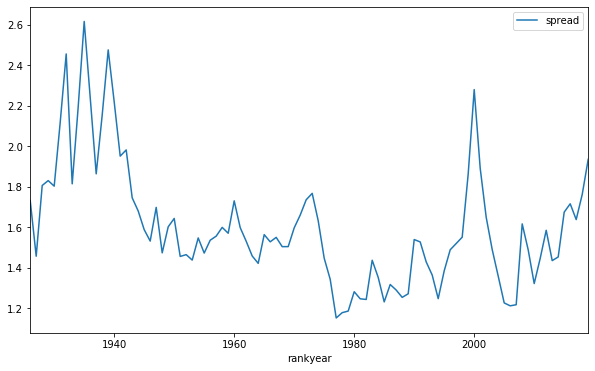

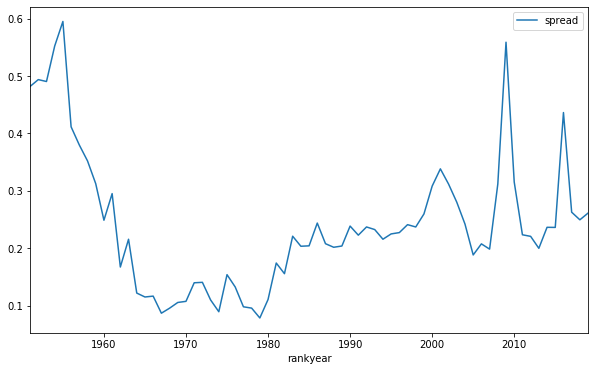

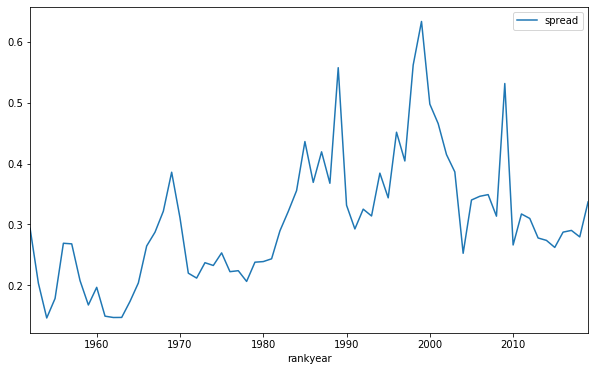

In [59]:
beme.plot(x ='rankyear', y='spread', kind = 'line')
op.plot(x ='rankyear', y='spread', kind = 'line')
inv.plot(x ='rankyear', y='spread', kind = 'line')
